In [85]:
import httpx 
import json
import os
import pickle

# There exists multiple implementations of jsonpath for Python, not all of them have the ability to filter. 
# Some implementations throw an error if you try to use a filter funcitonallity within JSON path

from jsonpath_ng.ext import parser 

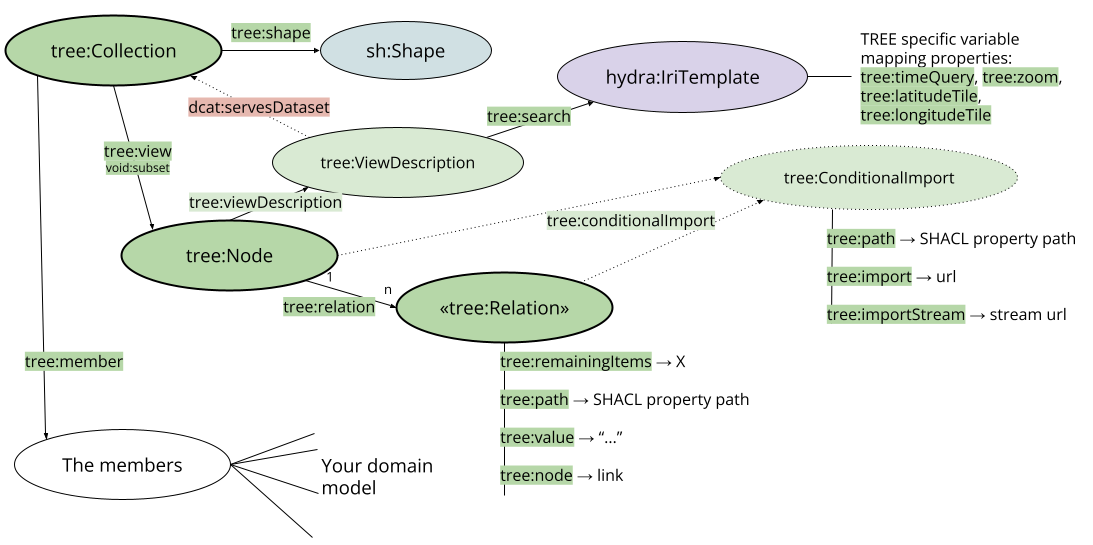

In [12]:
# The base url points to a page that has an overview of all the datasets
base = "https://apidg.gent.be/opendata/adlib2eventstream/v1/"
datasets = httpx.get(base).json()

print(json.dumps(datasets,indent=4))


{
    "@context": [
        "https://apidg.gent.be/opendata/adlib2eventstream/v1/context/DCAT-AP-VL.jsonld",
        {
            "dcterms": "http://purl.org/dc/terms/",
            "ldes": "https://w3id.org/ldes#",
            "tree": "https://w3id.org/tree#",
            "tree:view": {
                "@type": "@id"
            }
        }
    ],
    "@id": "https://stad.gent/id/dcat/coghent",
    "@type": "Datasetcatalogus",
    "Datasetcatalogus.titel": {
        "@value": "Catalogus CoGhent",
        "@language": "nl"
    },
    "Datasetcatalogus.beschrijving": {
        "@value": "Catalogus van datasets voor de Collectie van de Gentenaar.",
        "@language": "nl"
    },
    "Datasetcatalogus.heeftLicentie": {
        "@id": "https://creativecommons.org/publicdomain/zero/1.0/"
    },
    "Datasetcatalogus.heeftUitgever": {
        "@id": "http://stad.gent/",
        "Agent.naam": {
            "@value": "Stad Gent",
            "@language": "nl"
        }
    },
    "Datasetca

In [15]:
# Find all collections
matches = parser.parse('$..["Datasetcatalogus.heeftDataset"][*]["tree:view"]').find(datasets)
urls = []
for match in matches:
    urls.append(match.value)

In [16]:
urls

['https://apidg.gent.be/opendata/adlib2eventstream/v1/adlib/thesaurus',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/adlib/personen',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/archiefgent/objecten',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/dmg/tentoonstellingen',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/dmg/objecten',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/hva/objecten',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/industriemuseum/objecten',
 'https://apidg.gent.be/opendata/adlib2eventstream/v1/stam/objecten']

In [58]:
# Fetch all the members of the collection - even with pagination. 
url = urls[4]

def fetch_all_members(collection_url):
    """
    Find all members of a collection. A collection consists of multiple nodes. 
    The function iterates through all the nodes of a collection & appends the context into one list.
    """
    dataset = httpx.get(url,follow_redirects=True).json()

    # extract members 
    matches = parser.parse('$..["@included"][*]').find(dataset)
    members = []
    for match in matches:
        members.append(match.value)
    
    # find next nodes
    matches = parser.parse('$..["tree:relation"][?(@.["@type"]=="tree:LessThanRelation")]["tree:node"]').find(dataset)
    if len(matches):
        members = members +fetch_all_members(matches[0].value)
    
    return members
    



In [79]:
if not os.path.isfile('collection_members.pickle'):
    collection_members = []
    for url in urls:
        collection_members += fetch_all_members(url)

    with open('collection_members.pickle', 'wb') as handle:
        pickle.dump(collection_members, handle)

else:
    with open('collection_members.pickle', 'rb') as handle:
        collection_members = pickle.load(handle)

In [101]:
len(collection_members)

293553

In [88]:
collection_members[55]

{'@context': ['https://apidg.gent.be/opendata/adlib2eventstream/v1/context/persoon-basis.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/cultureel-erfgoed-object-ap.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/generiek-basis.jsonld',
  {'skos': 'http://www.w3.org/2004/02/skos/core#',
   'skos:inScheme': {'@type': '@id'},
   'owl': 'http://www.w3.org/2002/07/owl#',
   'owl:sameAs': {'@type': '@id'},
   'opmerking': 'http://www.w3.org/2004/02/skos/core#note',
   'dcterms:isVersionOf': {'@type': '@id'}}],
 '@id': 'https://stad.gent/id/concept/670000912/2023-04-05T00:06:04.741Z',
 '@type': 'skos:Concept',
 'dcterms:isVersionOf': 'https://stad.gent/id/concept/670000912',
 'prov:generatedAtTime': '2023-04-05T00:06:04.741Z',
 'owl:sameAs': 'https://id.erfgoed.net/themas/3029',
 'Object.identificator': [{'@type': 'Identificator',
   'Identificator.identificator': {'@value': '670000912',
    '@type': 'https://stad.gent/id/identificatiesysteem/p

In [89]:
collection_members[56]

{'@context': ['https://apidg.gent.be/opendata/adlib2eventstream/v1/context/persoon-basis.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/cultureel-erfgoed-object-ap.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/generiek-basis.jsonld',
  {'skos': 'http://www.w3.org/2004/02/skos/core#',
   'skos:inScheme': {'@type': '@id'},
   'owl': 'http://www.w3.org/2002/07/owl#',
   'owl:sameAs': {'@type': '@id'},
   'opmerking': 'http://www.w3.org/2004/02/skos/core#note',
   'dcterms:isVersionOf': {'@type': '@id'}}],
 '@id': 'https://stad.gent/id/concept/670000913/2023-04-05T00:06:09.742Z',
 '@type': 'skos:Concept',
 'dcterms:isVersionOf': 'https://stad.gent/id/concept/670000913',
 'prov:generatedAtTime': '2023-04-05T00:06:09.742Z',
 'owl:sameAs': 'https://id.erfgoed.net/themas/2733',
 'Object.identificator': [{'@type': 'Identificator',
   'Identificator.identificator': {'@value': '670000913',
    '@type': 'https://stad.gent/id/identificatiesysteem/p

In [135]:
# check which geographical ID is being used:
id = "https://stad.gent/id/concept/670000913/2023-04-05T00:06:09.742Z" # key "id" no results
id = "https://id.erfgoed.net/themas/2733" # key "owl:sameAs", 6 results!
id = "https://stad.gent/id/concept/670000913" # key "dcterms:isVersionOf" 6 results! (but the same, because of versioning)

members_with_this_id = []
for member in collection_members:
    if id in member.values():
        members_with_this_id.append(member) 

len(members_with_this_id)

6

In [136]:
members_with_this_id[4]

{'@context': ['https://apidg.gent.be/opendata/adlib2eventstream/v1/context/persoon-basis.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/cultureel-erfgoed-object-ap.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/generiek-basis.jsonld',
  {'skos': 'http://www.w3.org/2004/02/skos/core#',
   'skos:inScheme': {'@type': '@id'},
   'owl': 'http://www.w3.org/2002/07/owl#',
   'owl:sameAs': {'@type': '@id'},
   'opmerking': 'http://www.w3.org/2004/02/skos/core#note',
   'dcterms:isVersionOf': {'@type': '@id'}}],
 '@id': 'https://stad.gent/id/concept/670000913/2023-01-20T01:11:12.986Z',
 '@type': 'skos:Concept',
 'dcterms:isVersionOf': 'https://stad.gent/id/concept/670000913',
 'prov:generatedAtTime': '2023-01-20T01:11:12.986Z',
 'owl:sameAs': 'https://id.erfgoed.net/themas/2733',
 'Object.identificator': [{'@type': 'Identificator',
   'Identificator.identificator': {'@value': '670000913',
    '@type': 'https://stad.gent/id/identificatiesysteem/p

In [132]:
members_with_this_id[5]


{'@context': ['https://apidg.gent.be/opendata/adlib2eventstream/v1/context/persoon-basis.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/cultureel-erfgoed-object-ap.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/generiek-basis.jsonld',
  {'skos': 'http://www.w3.org/2004/02/skos/core#',
   'skos:inScheme': {'@type': '@id'},
   'owl': 'http://www.w3.org/2002/07/owl#',
   'owl:sameAs': {'@type': '@id'},
   'opmerking': 'http://www.w3.org/2004/02/skos/core#note',
   'dcterms:isVersionOf': {'@type': '@id'}}],
 '@id': 'https://stad.gent/id/concept/670000913/2023-01-07T18:02:23.459Z',
 '@type': 'skos:Concept',
 'dcterms:isVersionOf': 'https://stad.gent/id/concept/670000913',
 'prov:generatedAtTime': '2023-01-07T18:02:23.459Z',
 'owl:sameAs': 'https://id.erfgoed.net/themas/2733',
 'Object.identificator': [{'@type': 'Identificator',
   'Identificator.identificator': {'@value': '670000913',
    '@type': 'https://stad.gent/id/identificatiesysteem/p

In [133]:
members_with_this_id[4]


{'@context': ['https://apidg.gent.be/opendata/adlib2eventstream/v1/context/persoon-basis.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/cultureel-erfgoed-object-ap.jsonld',
  'https://apidg.gent.be/opendata/adlib2eventstream/v1/context/generiek-basis.jsonld',
  {'skos': 'http://www.w3.org/2004/02/skos/core#',
   'skos:inScheme': {'@type': '@id'},
   'owl': 'http://www.w3.org/2002/07/owl#',
   'owl:sameAs': {'@type': '@id'},
   'opmerking': 'http://www.w3.org/2004/02/skos/core#note',
   'dcterms:isVersionOf': {'@type': '@id'}}],
 '@id': 'https://stad.gent/id/concept/670000913/2023-01-20T01:11:12.986Z',
 '@type': 'skos:Concept',
 'dcterms:isVersionOf': 'https://stad.gent/id/concept/670000913',
 'prov:generatedAtTime': '2023-01-20T01:11:12.986Z',
 'owl:sameAs': 'https://id.erfgoed.net/themas/2733',
 'Object.identificator': [{'@type': 'Identificator',
   'Identificator.identificator': {'@value': '670000913',
    '@type': 'https://stad.gent/id/identificatiesysteem/p